<a href="https://colab.research.google.com/github/mjaliz/tfztm/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

 Computer vision is the pracitce of writing algorithims which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.



## Get the data

In [144]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-24 12:34:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.5’

pizza_steak.zip.5   100%[===================>] 104.47M   175MB/s    in 0.6s    

2023-09-24 12:34:51 (175 MB/s) - ‘pizza_steak.zip.5’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usaully means visualizing many samples of your data

In [145]:
!ls pizza_steak

test  train


In [146]:
!ls pizza_steak/train

pizza  steak


In [147]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [148]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [149]:
# Another fo find out how many image are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmitcally

In [150]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #  Created a list of class_names from the subdirectories
print(class_names)


['pizza' 'steak']


In [151]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


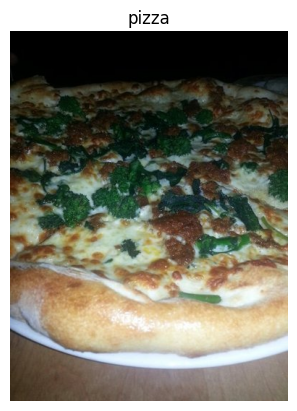

In [152]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

In [153]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 53,  40,  23],
        [ 54,  41,  24],
        [ 56,  43,  26],
        ...,
        [113, 106,  87],
        [112, 105,  86],
        [109, 102,  83]],

       [[ 55,  42,  25],
        [ 56,  43,  26],
        [ 57,  44,  27],
        ...,
        [111, 104,  85],
        [110, 103,  84],
        [108, 101,  82]],

       [[ 57,  44,  27],
        [ 57,  44,  27],
        [ 58,  45,  28],
        ...,
        [109, 102,  8

In [154]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

In [155]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.20784314, 0.15686275, 0.09019608],
        [0.21176471, 0.16078431, 0.09411765],
        [0.21960784, 0

## An end-to-end example

Let's build a convolutinal neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our image
* Build our CNN fo find patterns in our images
* Compile our CNN
* Fit the CNN our training data

In [156]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer websiet)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 181ms/step - loss: 0.5529 - accuracy: 0.7040 - val_loss: 0.4224 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4306 - accuracy: 0.8040 - val_loss: 0.3471 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3987 - accuracy: 0.8213 - val_loss: 0.3291 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3760 - accuracy: 0.8400 - val_loss: 0.3700 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3003 - accuracy: 0.8813 - val_loss: 0.3286 - val_accuracy: 0.8700


In [157]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                               

## Using the same model as before

Let's replicate the model we've build in a prevoius section to see if it works with our image data.

In [158]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TnesorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 0.9642 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6933 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6935 - accuracy: 0.4840 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6936 - accuracy: 0.4827 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.5260


In [159]:
#  Get a summary of model_2
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 150528)            0         
                                                                 
 dense_51 (Dense)            (None, 4)                 602116    
                                                                 
 dense_52 (Dense)            (None, 4)                 20        
                                                                 
 dense_53 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 preforms terribly... let's try tom improve it.

In [160]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 4.6382 - accuracy: 0.6327 - val_loss: 1.4577 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 1.2158 - accuracy: 0.6787 - val_loss: 0.5112 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6594 - accuracy: 0.7340 - val_loss: 0.6630 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6783 - accuracy: 0.7373 - val_loss: 0.4637 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.7169 - accuracy: 0.7393 - val_loss: 0.5103 - val_accuracy: 0.7540


In [161]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 150528)            0         
                                                                 
 dense_54 (Dense)            (None, 100)               15052900  
                                                                 
 dense_55 (Dense)            (None, 100)               10100     
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                                 
 dense_57 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classifiaction: Let's break it down

1. Become one with data (visualize, visualize, visualize)
2. Preporcess the data (prepared it for our moedl, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust differnet parameters and imporve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Becom one with the data

Image shape: (382, 512, 3)
Image shape: (306, 512, 3)


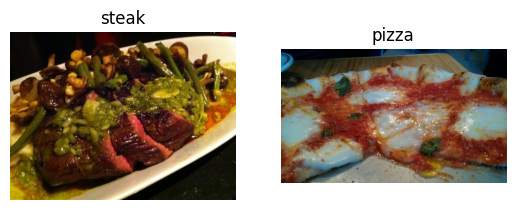

In [162]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

###2. Preprocess the data (prepare it for a model)

In [163]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our ntex step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of you processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [164]:
# Create training and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [165]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [166]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the next batch of images/labels in the train_data
len(images), len(labels)

(32, 32)

In [167]:
# How many batches are there?
len(train_data) # 1500/32

47

In [168]:
1500/32

46.875

In [169]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [170]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relativeliy simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [171]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [172]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # this size of sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", ouput shape is same as input shape, if "valid", ouput shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [173]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [174]:
model_4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_38 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_24 (Flatten)        (None, 475240)            0         
                                                                 
 dense_58 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [175]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [176]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 0.6940 - accuracy: 0.6773 - val_loss: 0.4875 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4590 - accuracy: 0.7987 - val_loss: 0.4252 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3816 - accuracy: 0.8480 - val_loss: 0.3672 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.2726 - accuracy: 0.9007 - val_loss: 0.3382 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.1311 - accuracy: 0.9607 - val_loss: 0.3827 - val_accuracy: 0.8320


### 5. Evaluating our model

It looks like our model is learning someting, let's evaluate it.

<Axes: >

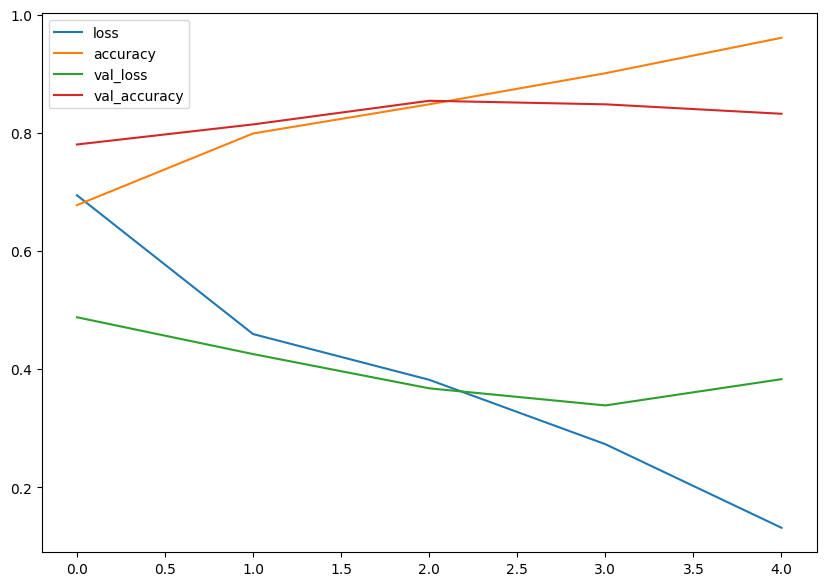

In [177]:
# Let's plot the training curve
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [178]:
# Plot the validation and training curves separatly
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

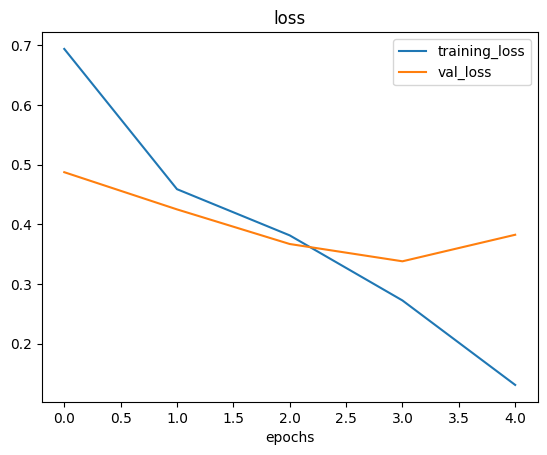

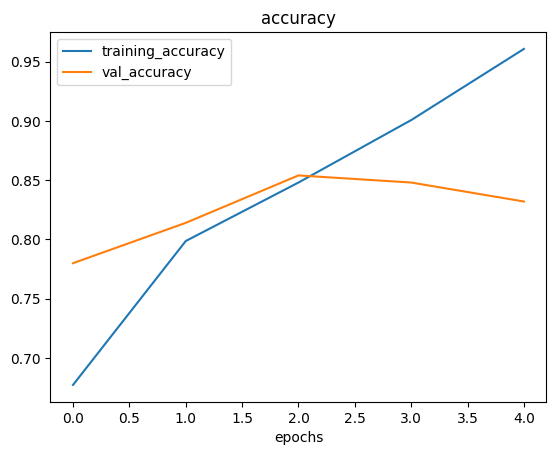

In [179]:
# Check out the loss and accuracy of model_4
plot_loss_curve(history_4)

 ### 6. Adjust the model parameters

 Fitting a machine learning model comes in 3 steps:

 0. Create a baseline
 1. Beat the baseline by oferfitting a larger model
 2. Reduce overfitting

 Ways to induce overfitting:
 * Increase the number of conv layers
 * Increase the number of conv filters
 * Add another dense layer to the output of our flattened layer

 Reduce overfitting:
 * Add data augmentation
 * Add regularization layers (such as MaxPool2D)
 * Add more data...


In [187]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [188]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [189]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 8s 122ms/step - loss: 0.6127 - accuracy: 0.6520 - val_loss: 0.4533 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 0.4534 - accuracy: 0.7900 - val_loss: 0.3629 - val_accuracy: 0.8420
Epoch 3/10
47/47 [==============================] - 5s 115ms/step - loss: 0.4013 - accuracy: 0.8213 - val_loss: 0.3271 - val_accuracy: 0.8700
Epoch 4/10
47/47 [==============================] - 6s 130ms/step - loss: 0.3911 - accuracy: 0.8327 - val_loss: 0.3176 - val_accuracy: 0.8780
Epoch 5/10
47/47 [==============================] - 8s 172ms/step - loss: 0.3573 - accuracy: 0.8467 - val_loss: 0.3100 - val_accuracy: 0.8800
Epoch 6/10
47/47 [==============================] - 5s 110ms/step - loss: 0.3366 - accuracy: 0.8580 - val_loss: 0.2869 - val_accuracy: 0.9000
Epoch 7/10
47/47 [==============================] - 7s 142ms/step - loss: 0.3123 - accuracy: 0.8667 - val_loss: 0.3247 - val_accuracy: 0.8560
Epoch 

In [190]:
# Get a summary of model with max pooling
model_5.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 10)      

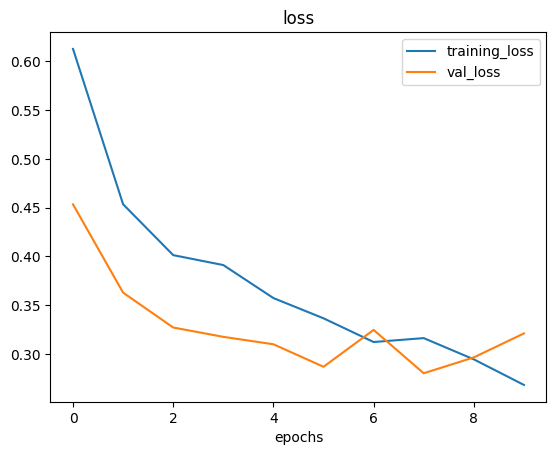

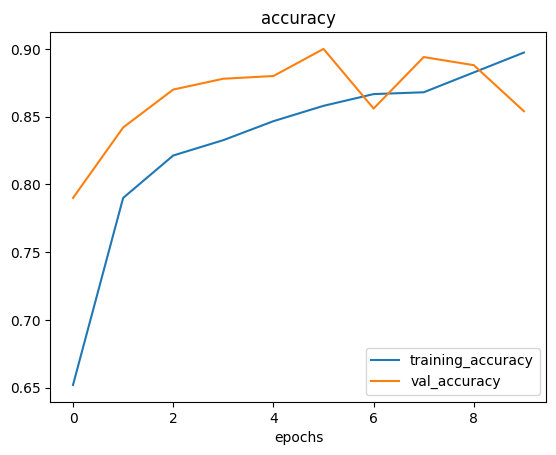

In [191]:
# Plot loss curves
plot_loss_curve(history_5)